<a href="https://colab.research.google.com/github/chiarabuono/ML-Lab4-Neural-Networks/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input


import seaborn as sns #For visualization purpose
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('breast_cancer/wdbc.data',delimiter = ',',header=None)

# Drop column related to patient ID
data.drop(data.columns[0], axis=1, inplace=True)
# Select target column
targets = data.iloc[:, 0]
targets = targets.map({'M': 0, 'B': 1})

# Drop target column from training set
data.drop(data.columns[0], axis=1, inplace=True)

# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(data,targets,test_size=0.25,random_state=101)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check correct dimensions of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [ ]:
# Build neural network architecture
model = Sequential([
    Input(shape=(data.shape[1],)),  # Specifica la forma degli input
    Dense(512, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='linear')  # Output continuo per regressione
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
es = EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])

# Set fixed seed for reproducibility
np.random.seed(1)

In [ ]:
# Train the model
history = model.fit(X_train,y_train, validation_split=0.2, epochs=500, batch_size=10, callbacks=[es])

# Print summary data
model.summary()

# Get the outputs corresponding to all the data
outputs = model.predict(data)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6238 - loss: 0.2146 - val_accuracy: 0.9651 - val_loss: 0.0692
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9250 - loss: 0.0680 - val_accuracy: 0.9884 - val_loss: 0.0370
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.0578 - val_accuracy: 0.9767 - val_loss: 0.0371
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9643 - loss: 0.0455 - val_accuracy: 0.9884 - val_loss: 0.0328
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.0480 - val_accuracy: 0.9884 - val_loss: 0.0271
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0275 - val_accuracy: 0.9884 - val_loss: 0.0246
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.0389 - val_accuracy: 0.9884 - val_loss: 0.0211
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0218 - val_accuracy: 0.9884 -

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 512)                 │          15,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,285 (583.15 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,524 (388.77 KB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9813 - loss: 0.0144
Test loss: 0.02
Test accuracy: 0.98


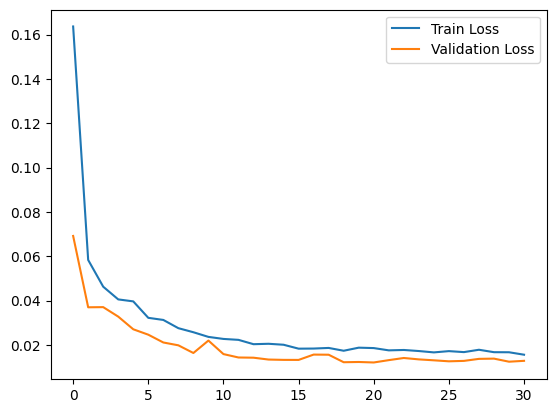

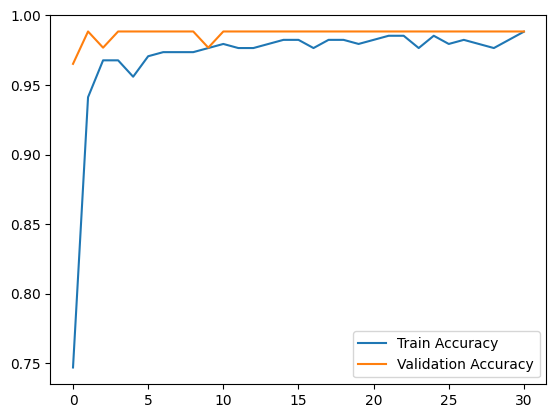

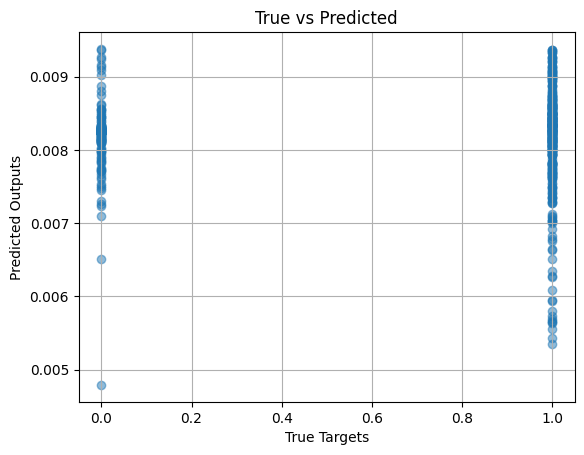

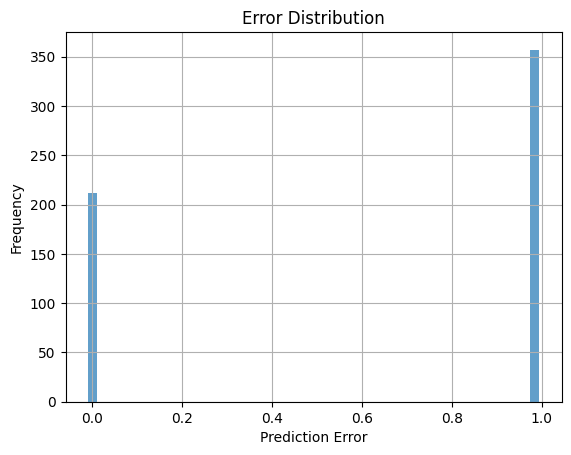

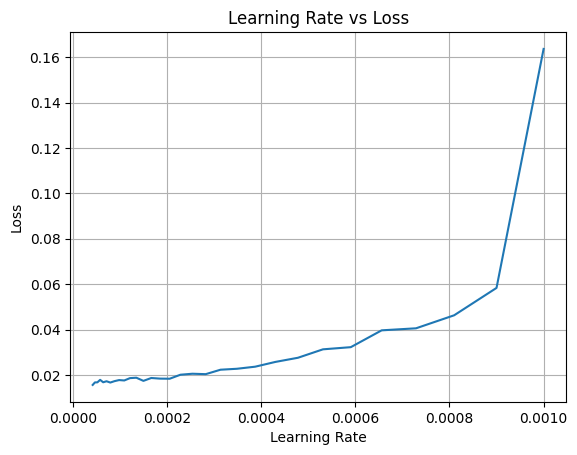

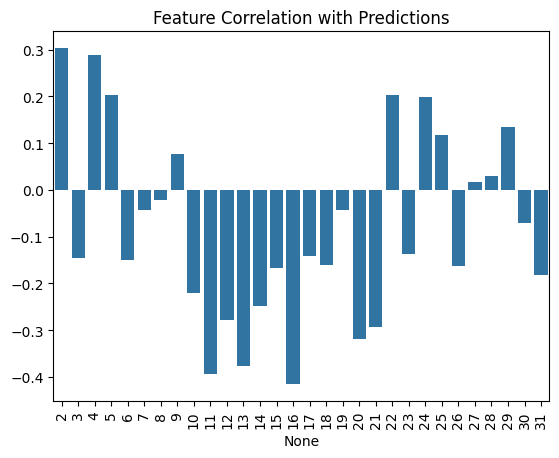

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

import matplotlib.pyplot as plt

# Grafico della loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Grafico della accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.legend()
# plt.show()

plt.scatter(targets, outputs, alpha=0.5)
plt.xlabel('True Targets')
plt.ylabel('Predicted Outputs')
plt.title('True vs Predicted')
plt.grid()
plt.show()

errors = targets - outputs.flatten()
plt.hist(errors, bins=50, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid()
plt.show()

lr_history = [0.001 * (0.9 ** epoch) for epoch in range(len(history.history['loss']))]
plt.plot(lr_history, history.history['loss'], label='Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.grid()
plt.show()

import seaborn as sns

corr = pd.DataFrame(data).corrwith(pd.Series(outputs.flatten()))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Predictions')
plt.show()



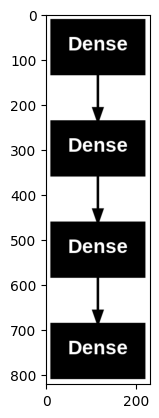

In [ ]:
# Generate graphic representation and show it
filename = 'breastcancer.png'
plot_model(model, to_file=filename)
plt.imshow(im.imread(filename),cmap='Greys_r')
plt.show()

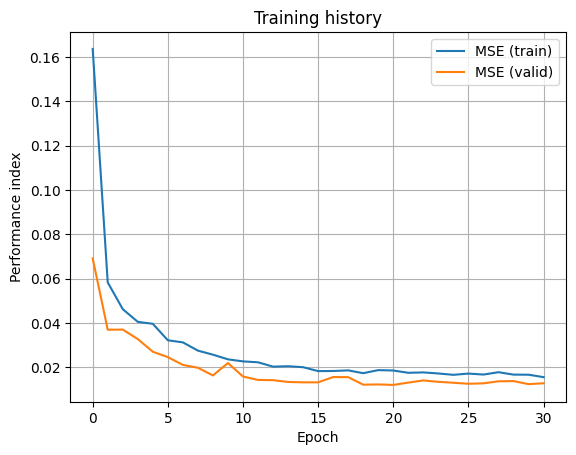

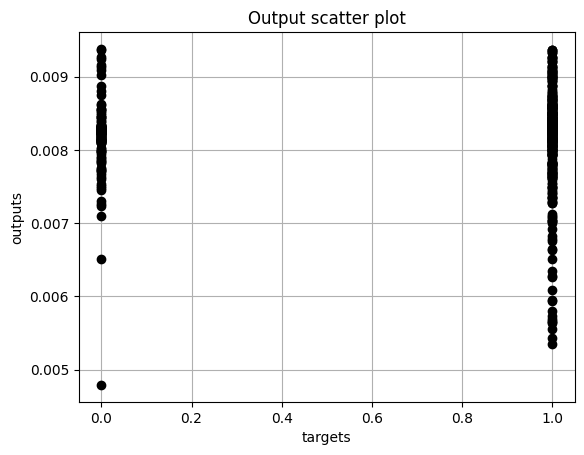

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('Performance index')
plt.xlabel('Epoch')
plt.legend(['MSE (train)', 'MSE (valid)'], loc='upper right')
plt.grid()
plt.show()

# Plot target-output relationship (ideal: targets == outputs, straight line)
plt.plot(targets,outputs,'ok')
plt.title('Output scatter plot')
plt.xlabel('targets')
plt.ylabel('outputs')
plt.grid()
plt.show()


In [ ]:
validation_stop_epoch = np.array(history.history['val_loss']).argmin()
print(validation_stop_epoch)
print('%.2E' % history.history['val_loss'][validation_stop_epoch])

20
1.21E-02


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9727 - loss: 0.0214  
Train score: [0.015224678441882133, 0.9812206625938416]
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9813 - loss: 0.0144
Test score: [0.016847847029566765, 0.9790209531784058]
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step


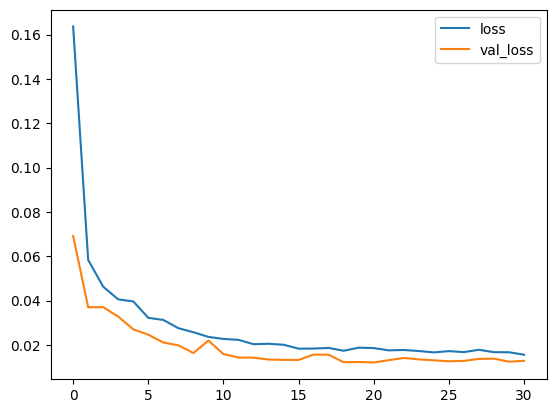

Confusion matrix: 
 [[54  1]
 [ 2 86]]


In [ ]:
print("Train score:", model.evaluate(X_train, y_train)) # Evaluate returns loss and accuracy on train set
print("Test score:", model.evaluate(X_test, y_test)) # Evaluate returns loss and accuracy on test set

# Predict the target values for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)